# Ice sheet model output 

## This notebook demonstrates how to load, process and plot output from an ensemble of simulations of the Antarctic Ice Sheet from the last interglacial to present. 

(c) 2020 by Torsten Albrecht (torsten.albrecht@pik-potsdam.de) | Potsdam Institute for Climate Impact Research (PIK)

**data:** Albrecht, Torsten (2019): PISM parameter ensemble analysis of Antarctic Ice Sheet glacial cycle simulations. PANGAEA, https://doi.pangaea.de/10.1594/PANGAEA.909728

More details on the ensemble can be found [here](https://doi.org/10.5281/zenodo.3585118).

In [5]:
# load a package called intake, which is used to load the data. 
import intake

## 1. Lazily load the model data
Selected outputs from the model ensemble are stored in two zarr directories in the google cloud. The data are cataloged in intake catalogs to simplify loading. 

The zarr directory 'present' contains fields that describe the state of each ensemble member at the end of the simulation, i.e. the simulated 'present-day' state. 

The zarr directory 'mask_score_time_series' contains time series of an integer mask (indicating ice-free/grounded/floating/ocean) for each ensemble member. 

The cell below first loads the intake catalog from a github repo, then loads data from these two zarr directories in turn. However, it loads the data 'lazily', meaning that the data does not enter into memory until we need them to, and 'present' and 'mask_score_time_series' are really just pointers to where the data are held, so that when we want to do a computation the machine will know where to look. 

In [6]:
# load the intake catalog
cat = intake.open_catalog('https://raw.githubusercontent.com/ldeo-glaciology/pangeo-pismpaleo/main/paleopism.yaml')

# load each of the zarr diretories contained in the intake catalog
present  = cat["present"].to_dask()
mask_score_time_series  = cat["mask_score_time_series"].to_dask()

## 2. Let's take a look at the resulting xarrays

### present

#### dimensions

present is a 7-dimensional xarray:

It has dimensions corresponding to each of the four ensemble parameters:
            par_esia, par_ppq, par_prec and par_visc
            
It has one time dimension, but this is only one element long so it can be mostly ignored.

It has two spatial dimensions, x and y.

Each dimensionn has a corresponding coordinate, which provides the values for the dimensions (i.e. the parameter values, the UPS X and Y). There is also an addition pair of coordinates called lat and lon, which provide the geographic positions of the grid cells.

#### variables
It contains variables corresponding to ice thickness (thk), ice surface elevation (usurf), ice speed (velsurf_mag), an integer mask (mask; indicating ice-free/grounded/floating/ocean), and bedrock uplift rate (dbdt).

It also contains a variable called 'score', which quantifies how well that ensemble member matched observationally constrain ice-sheet extent.


#### the xarray can be viewed by simply typing it name and executing the cell:

In [7]:
present.nbytes/1e9

1.228653032

In [8]:
present

<xarray.Dataset>
Dimensions:      (par_esia: 4, par_ppq: 4, par_prec: 4, par_visc: 4, time: 1, x: 381, y: 381)
Coordinates:
    lat          (y, x) float64 dask.array<chunksize=(191, 191), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(191, 191), meta=np.ndarray>
  * par_esia     (par_esia) float64 1.0 2.0 4.0 7.0
  * par_ppq      (par_ppq) float64 0.25 0.5 0.75 1.0
  * par_prec     (par_prec) float64 0.02 0.05 0.07 0.1
  * par_visc     (par_visc) float64 1e+20 5e+20 2.5e+21 1e+22
  * time         (time) float64 50.0
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Data variables:
    dbdt         (time, y, x, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    index        (par_esia, par_ppq, par_prec, par_visc) int64 dask.array<chunksize=(4, 4, 4, 4), meta=np.ndarray>
    mask         (time, y, x, par_esia, par_ppq, par_prec, par_visc) int8 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    score        (par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(4, 4, 4, 4), meta=np.ndarray>
    thk          (time, y, x, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    topg         (time, y, x, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    usurf        (time, y, x, par_esia, par_ppq, par_prec, par_visc) float32 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    velsurf_mag  (time, y, x, par_esia, par_ppq, par_prec, par_visc) float32 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
Attributes:
    NCO:              4.6.8
    command:           /p/tmp/albrecht/pism18/pismOut/pism_paleo/pism1.0_pale...
    history:          Thu Dec  5 15:34:39 2019: ncatted -O -a history,global,...
    parameter_space:  {'visc': [1e+20, 5e+20, 2.5e+21, 1e+22], 'sia_e': [1.0,...

### mask_score_time_series is also a 7-dimensional xarray:

It has the same dimensions as present (above), but mask_score_time_series.time has a length of 125, indicating that this dataset has multiple time slices. 

In [9]:
mask_score_time_series

<xarray.Dataset>
Dimensions:   (par_esia: 4, par_ppq: 4, par_prec: 4, par_visc: 4, time: 125, x: 381, y: 381)
Coordinates:
  * par_esia  (par_esia) float64 1.0 2.0 4.0 7.0
  * par_ppq   (par_ppq) float64 0.25 0.5 0.75 1.0
  * par_prec  (par_prec) float64 0.02 0.05 0.07 0.1
  * par_visc  (par_visc) float64 1e+20 5e+20 2.5e+21 1e+22
  * time      (time) float64 -1.24e+05 -1.23e+05 -1.22e+05 ... -2e+03 -1e+03 0.0
  * x         (x) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
  * y         (y) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
Data variables:
    index     (par_esia, par_ppq, par_prec, par_visc) int64 dask.array<chunksize=(4, 4, 4, 4), meta=np.ndarray>
    mask      (time, y, x, par_esia, par_ppq, par_prec, par_visc) int8 dask.array<chunksize=(125, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    score     (time, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(125, 4, 4, 4, 4), meta=np.ndarray>
Attributes:
    NCO:              4.6.8
    command:           /p/tmp/albrecht/pism18/pismOut/pism_paleo/pism1.0_pale...
    history:          Thu Dec  5 16:44:54 2019: ncatted -O -a history,global,...
    parameter_space:  {'visc': [1e+20, 5e+20, 2.5e+21, 1e+22], 'sia_e': [1.0,...

## 3. Let's plot the ice velocity field of one the ensemble members
To select one of the ensemble members you need to choose which of the different choices for each paramater you want to plot. 
This example picks this randomly. 

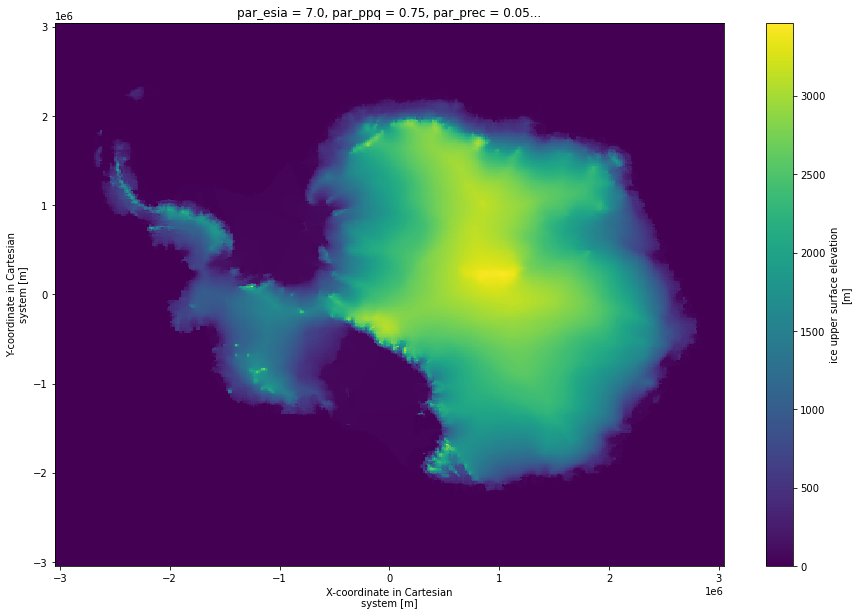

In [10]:
#present.usurf[3,2,1,2]
present.usurf.isel(par_esia=3,par_ppq = 2, par_prec= 1,par_visc = 2).plot(size = 10)

## 4. Do some calculations using all ensemble members 


### 4a. calculate the standard deviation of thickness across the ensemble for each location

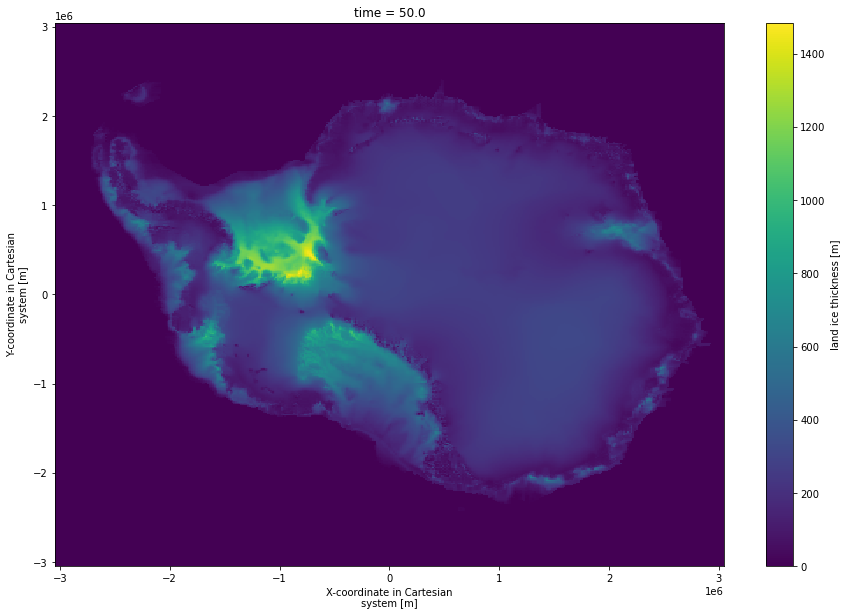

In [11]:
mean_std = present.thk.std({'par_esia','par_visc','par_ppq','par_prec'},keep_attrs=True)
mean_std.plot(size = 10)

## 4b. Compute anomalies
Compute the difference between several ensemble members and the ensemble-wide mean computed above, then plot the results as an array of plots.

In [13]:
mean_thk = present.thk.mean({'par_esia','par_visc','par_ppq','par_prec'},keep_attrs=True)
thickness_anomaly = (present.thk.isel(par_ppq=3,par_prec=2)-mean_thk)
thickness_anomaly

<xarray.DataArray 'thk' (time: 1, y: 381, x: 381, par_esia: 4, par_visc: 4)>
dask.array<sub, shape=(1, 381, 381, 4, 4), dtype=float64, chunksize=(1, 381, 381, 1, 4), chunktype=numpy.ndarray>
Coordinates:
    lat       (y, x) float64 dask.array<chunksize=(191, 191), meta=np.ndarray>
    lon       (y, x) float64 dask.array<chunksize=(191, 191), meta=np.ndarray>
  * par_esia  (par_esia) float64 1.0 2.0 4.0 7.0
    par_ppq   float64 1.0
    par_prec  float64 0.07
  * par_visc  (par_visc) float64 1e+20 5e+20 2.5e+21 1e+22
  * time      (time) float64 50.0
  * x         (x) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
  * y         (y) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06

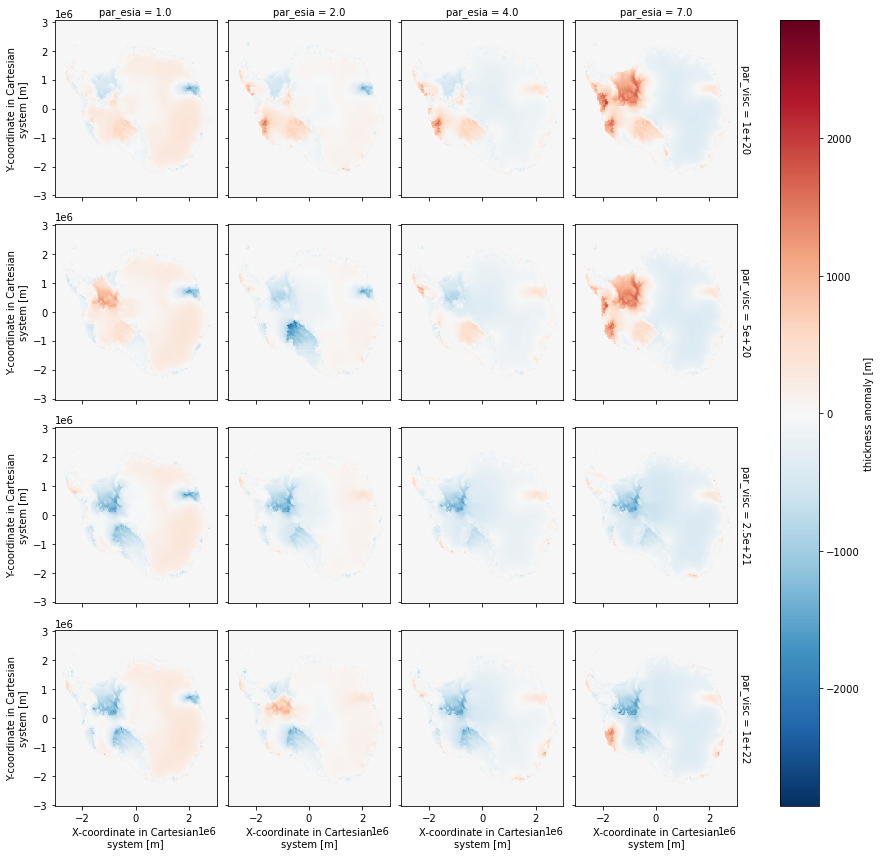

In [14]:
mean_thk = present.thk.mean({'par_esia','par_visc','par_ppq','par_prec'},keep_attrs=True)
thickness_anomaly = (present.thk.isel(par_ppq=3,par_prec=2)-mean_thk)
thickness_anomaly.attrs['long_name'] = 'thickness anomaly'
thickness_anomaly.attrs['units'] = 'm'
thickness_anomaly.plot(x='x',y='y',col='par_esia',row='par_visc');

## 5. Plot the time slice data. 

### 5a. plot a time series of total ice shelf area

In [15]:
cellArea = mask_score_time_series.x.attrs['spacing_meters'] * mask_score_time_series.y.attrs['spacing_meters']

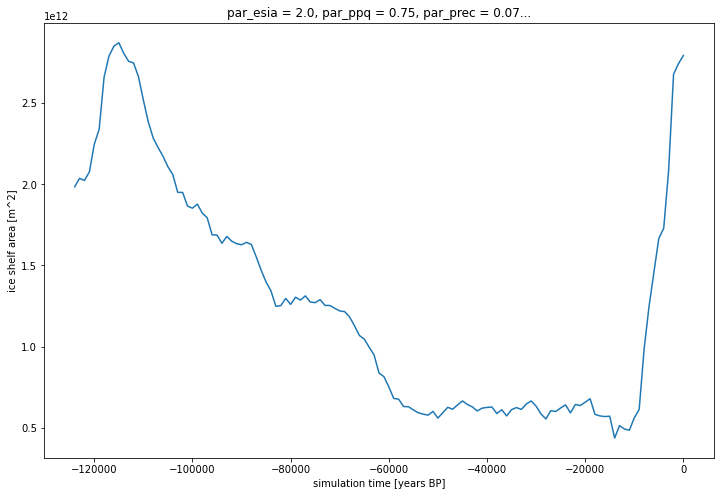

In [16]:
import xarray as xr
ice_shelf_area = (xr.where(mask_score_time_series.mask.isel(par_esia=1, par_ppq=2, par_prec=2, par_visc=3) == 3 ,1 ,0 ).sum(['x','y'])*cellArea)
ice_shelf_area.attrs['units'] = 'm^2'
ice_shelf_area.attrs['long_name'] = 'ice shelf area'
ice_shelf_area.time.attrs['long_name'] = 'simulation time'
ice_shelf_area.time.attrs['units'] = 'years BP'
p = ice_shelf_area.plot(size=8)


## 5b. Choose one of the ensemble members and plot masks for several time slices.

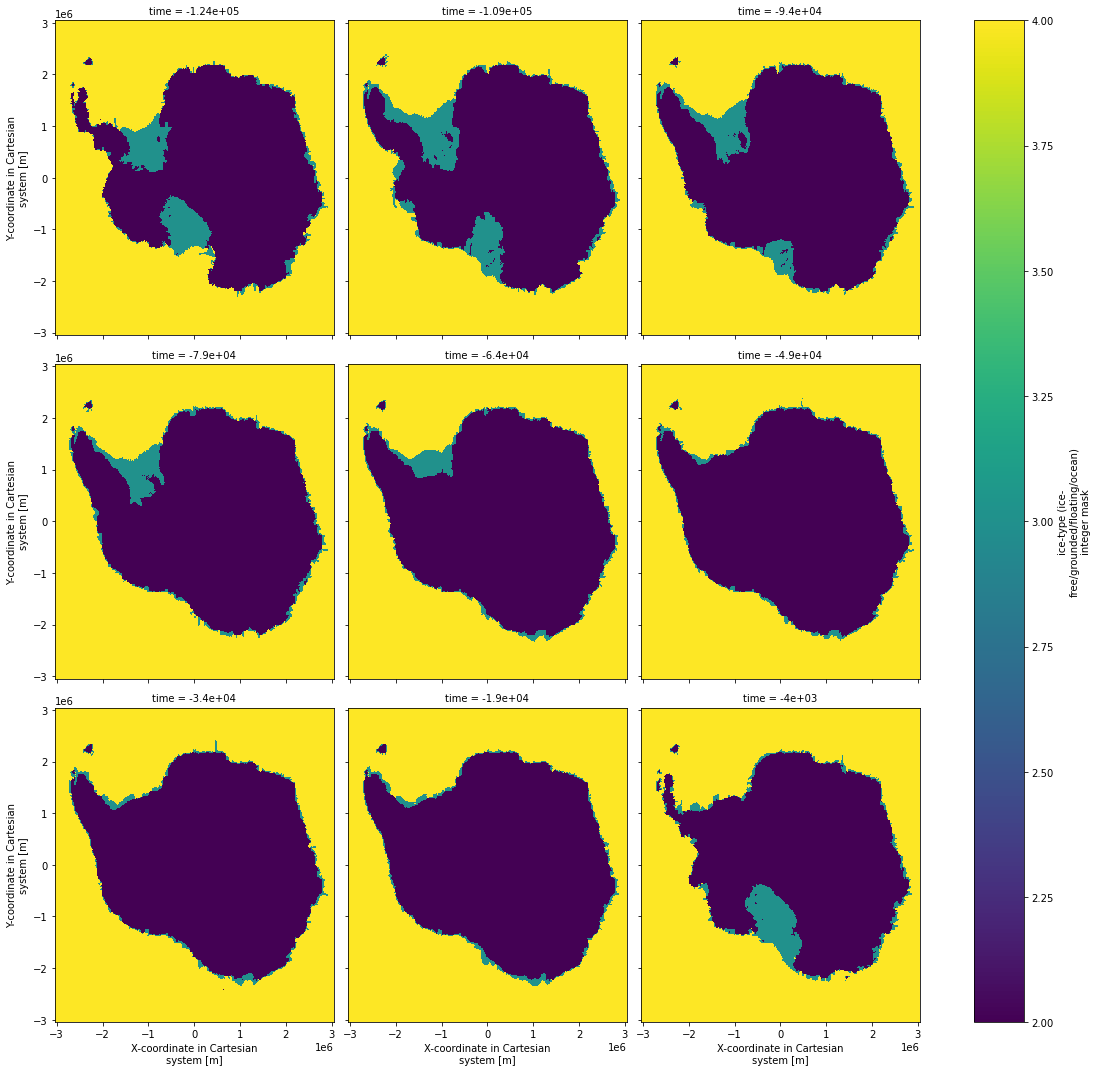

In [17]:
mask_score_time_series.mask.isel(par_esia=1, par_ppq=2, par_prec=2, par_visc=3,
                       time=slice(0,124,15)).plot(x='x',y='y',col='time',col_wrap=3,size = 5)

## 6. Plot a map of the most deglaciated each location becomes across the whole ensemble and all time.

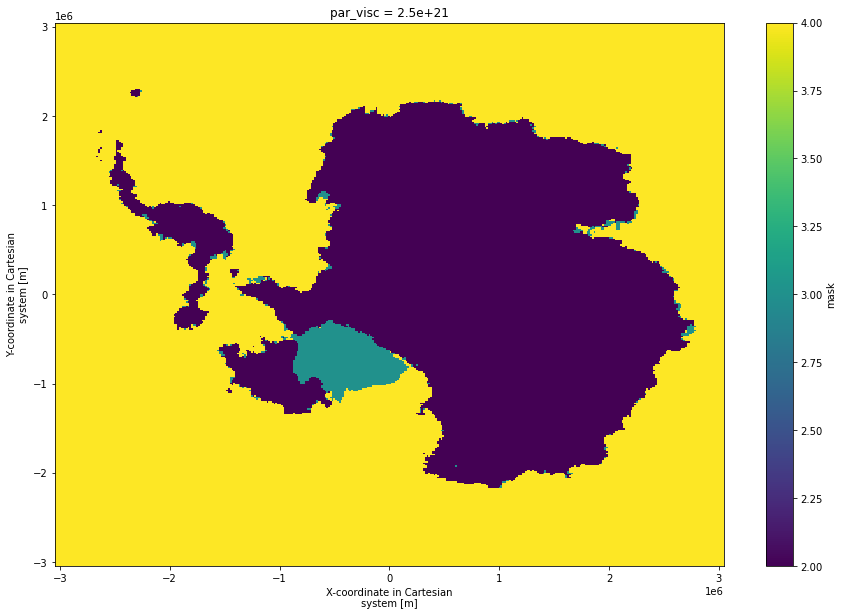

In [12]:
mask_score_time_series.mask.isel(par_visc=2).max({"par_esia","par_ppq","par_prec","time"}).plot(size = 10)

## 7. Now let's load a larger version of the dataset
Compared to mask_score_time_series (above), this version of the dataset includes several more spatial fields from each time step, so it is much larger. 

Its size means that we require a cloud cluster to do basic processing because it is too large to fit the required parts of the data into the memory of just the one cloud computer that this notebook is running on.

In [18]:
# load the data from the same intake catalog (stored in 'cat') as we used previously. 
snapshots1ka  = cat["snapshots1ka"].to_dask()
vels5ka  = cat["vels5ka"].to_dask()

snapshots1ka has the same number of dimensions as mask_score_time_series and present, but it has many more data variables. 

In [19]:
snapshots1ka

<xarray.Dataset>
Dimensions:     (par_esia: 4, par_ppq: 4, par_prec: 4, par_visc: 4, time: 125, x: 381, y: 381)
Coordinates:
  * par_esia    (par_esia) float64 1.0 2.0 4.0 7.0
  * par_ppq     (par_ppq) float64 0.25 0.5 0.75 1.0
  * par_prec    (par_prec) float64 0.02 0.05 0.07 0.1
  * par_visc    (par_visc) float64 1e+20 5e+20 2.5e+21 1e+22
  * time        (time) float64 -1.24e+05 -1.23e+05 -1.22e+05 ... -1e+03 0.0
  * x           (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y           (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Data variables:
    bmelt       (time, y, x, par_esia, par_ppq, par_prec, par_visc) float32 dask.array<chunksize=(25, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    dbdt        (time, y, x, par_esia, par_ppq, par_prec, par_visc) float32 dask.array<chunksize=(25, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    index       (par_esia, par_ppq, par_prec, par_visc) int64 dask.array<chunksize=(4, 4, 4, 4), meta=np.ndarray>
    mask        (time, y, x, par_esia, par_ppq, par_prec, par_visc) int8 dask.array<chunksize=(25, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    score       (time, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(125, 4, 4, 4, 4), meta=np.ndarray>
    thk         (time, y, x, par_esia, par_ppq, par_prec, par_visc) float32 dask.array<chunksize=(25, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    topg        (time, y, x, par_esia, par_ppq, par_prec, par_visc) float32 dask.array<chunksize=(25, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    usurf       (time, y, x, par_esia, par_ppq, par_prec, par_visc) float32 dask.array<chunksize=(25, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    velbar_mag  (time, y, x, par_esia, par_ppq, par_prec, par_visc) float32 dask.array<chunksize=(25, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.5
    parameter_space:  {'visc': [1e+20, 5e+20, 2.5e+21, 1e+22], 'sia_e': [1.0,...
    proj4:            +lon_0=0.0 +ellps=WGS84 +datum=WGS84 +lat_ts=-71.0 +pro...
    source:           PISM (stable v1.0-123-gf2e24e88f committed by Torsten A...

 is it therefore much larger: ~116GB

In [20]:
print(snapshots1ka.nbytes/1e9)

116.129065272


and each variable is ~18GB

In [21]:
snapshots1ka.thk.nbytes/1e9

18.580608

vels5ka includes the two orthogonal components of horizontal surface velocity, but at a lower time resolution of 5ka instead of v's 5ka time resolution. 

In [22]:
vels5ka

<xarray.Dataset>
Dimensions:     (par_esia: 4, par_ppq: 4, par_prec: 4, par_visc: 4, time: 26, x: 381, y: 381)
Coordinates:
    lat         (y, x) float64 dask.array<chunksize=(127, 127), meta=np.ndarray>
    lon         (y, x) float64 dask.array<chunksize=(127, 127), meta=np.ndarray>
  * par_esia    (par_esia) float64 1.0 2.0 4.0 7.0
  * par_ppq     (par_ppq) float64 0.25 0.5 0.75 1.0
  * par_prec    (par_prec) float64 0.02 0.05 0.07 0.1
  * par_visc    (par_visc) float64 1e+20 5e+20 2.5e+21 1e+22
  * time        (time) float64 -1.25e+05 -1.2e+05 -1.15e+05 ... -5e+03 0.0
  * x           (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y           (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Data variables:
    index       (par_esia, par_ppq, par_prec, par_visc) int64 dask.array<chunksize=(4, 4, 4, 4), meta=np.ndarray>
    score       (time, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(13, 4, 4, 4, 4), meta=np.ndarray>
    u_ssa       (time, y, x, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(13, 127, 127, 4, 4, 4, 4), meta=np.ndarray>
    v_ssa       (time, y, x, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(13, 127, 127, 4, 4, 4, 4), meta=np.ndarray>
    velbar_mag  (time, y, x, par_esia, par_ppq, par_prec, par_visc) float32 dask.array<chunksize=(13, 127, 127, 4, 4, 4, 4), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.5
    parameter_space:  {'visc': [1e+20, 5e+20, 2.5e+21, 1e+22], 'sia_e': [1.0,...
    proj4:            +lon_0=0.0 +ellps=WGS84 +datum=WGS84 +lat_ts=-71.0 +pro...
    source:           PISM (stable v1.0-123-gf2e24e88f committed by Torsten A...

...and is consequently smaller than snapshots1ka: ~19GB. 

In [18]:
print(vels5ka.nbytes/1e9)

19.326216624


### snapshots1ka requires a cloud cluster to do basic processing. 
the next two cell start up a cloud cluster with 20 workers. Once this cluster is running any operations on dask arrays (which are how the data are loaded in using the .to_dask() method. 

In [23]:
from dask.distributed import Client
import dask_gateway
gateway = dask_gateway.Gateway()
cluster = gateway.new_cluster()

In [24]:
cluster.scale(20)
client = Client(cluster)
cluster

clicking on the dashboard link above will allow you to monitor the progress of the computation below. 


## 8. Ice flux
A simple property who's computatiion includes two variables from snapshots1ka is ice flux (= ice thickness * mean surface speed). 


In [25]:
q = snapshots1ka.velbar_mag * snapshots1ka.thk

At this stage no computation has been performed. It has been planned out. We can see the shape and size of the final result we will get as follows.

In [26]:
q

<xarray.DataArray (time: 125, y: 381, x: 381, par_esia: 4, par_ppq: 4, par_prec: 4, par_visc: 4)>
dask.array<mul, shape=(125, 381, 381, 4, 4, 4, 4), dtype=float32, chunksize=(25, 381, 381, 1, 4, 4, 4), chunktype=numpy.ndarray>
Coordinates:
  * par_esia  (par_esia) float64 1.0 2.0 4.0 7.0
  * par_ppq   (par_ppq) float64 0.25 0.5 0.75 1.0
  * par_prec  (par_prec) float64 0.02 0.05 0.07 0.1
  * par_visc  (par_visc) float64 1e+20 5e+20 2.5e+21 1e+22
  * time      (time) float64 -1.24e+05 -1.23e+05 -1.22e+05 ... -2e+03 -1e+03 0.0
  * x         (x) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
  * y         (y) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06

It is the same size as the two dataarrays that are used to compute it, snapshots1ka.velbar_mag and snapshots1ka.thk. 

We could ask the cluster to compute the numbers by typing `q.compute()`. The only issue with doing this is that the cluster would do the computation then try to send the result back to the cloud computer that is running this notebook. As the result is going to be 18GB (see above) this will probably too big for the 'notebook machine' and it will crash. 

Instead, we could use `q.persist()` to compiute the result and then leave it in the memory of the cluster for use later, perhaps for further computation or some aggregation which reduces the data until it can be comfortably downloaded or plotted. 

In [28]:
%%time
q.persist()
q.attrs['units'] = 'm^2 yr^-1'
q.attrs['long_name'] = 'ice flux'
q.time.attrs['long_name'] = 'simulation time'
q.time.attrs['units'] = 'years BP'
q

CPU times: user 6.46 ms, sys: 3.81 ms, total: 10.3 ms
Wall time: 9 ms


<xarray.DataArray (time: 125, y: 381, x: 381, par_esia: 4, par_ppq: 4, par_prec: 4, par_visc: 4)>
dask.array<mul, shape=(125, 381, 381, 4, 4, 4, 4), dtype=float32, chunksize=(25, 381, 381, 1, 4, 4, 4), chunktype=numpy.ndarray>
Coordinates:
  * par_esia  (par_esia) float64 1.0 2.0 4.0 7.0
  * par_ppq   (par_ppq) float64 0.25 0.5 0.75 1.0
  * par_prec  (par_prec) float64 0.02 0.05 0.07 0.1
  * par_visc  (par_visc) float64 1e+20 5e+20 2.5e+21 1e+22
  * time      (time) float64 -1.24e+05 -1.23e+05 -1.22e+05 ... -2e+03 -1e+03 0.0
  * x         (x) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
  * y         (y) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
Attributes:
    units:      m^2 yr^-1
    long_name:  ice flux

One such aggregation could be taking the mean across the ensemble members and the time dimension. 

In [29]:
qmean = q.mean({"par_visc","par_esia","par_ppq","par_prec","time"})
qmean.attrs['units'] = 'm^2 yr^-1'
qmean.attrs['long_name'] = 'mean ice flux'
qmean

<xarray.DataArray (y: 381, x: 381)>
dask.array<mean_agg-aggregate, shape=(381, 381), dtype=float32, chunksize=(381, 381), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
  * y        (y) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
Attributes:
    units:      m^2 yr^-1
    long_name:  mean ice flux

This is MUCH smaller than q because it is only the same size as the spatial domain of the model 381 by 381. It can easily fit in memory, so we can use `qmean.compute()` to bring the result straight into the memory of the notebook machine. 

In [30]:
%%time
qmean.compute()

CPU times: user 39.4 ms, sys: 4.9 ms, total: 44.3 ms
Wall time: 29.8 s


<xarray.DataArray (y: 381, x: 381)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x        (x) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
  * y        (y) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
Attributes:
    units:      m^2 yr^-1
    long_name:  mean ice flux

Plot the result:

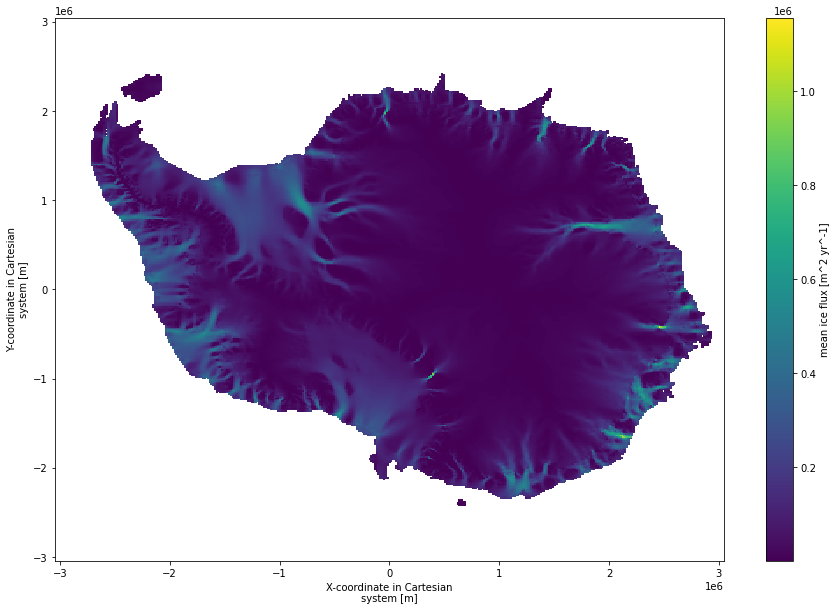

In [26]:
qmean.plot(size=10)

Note that we could have done the whole computation (computing q and taking the mean and plotting) in one go with 

CPU times: user 90 ms, sys: 4.51 ms, total: 94.5 ms
Wall time: 16.2 s


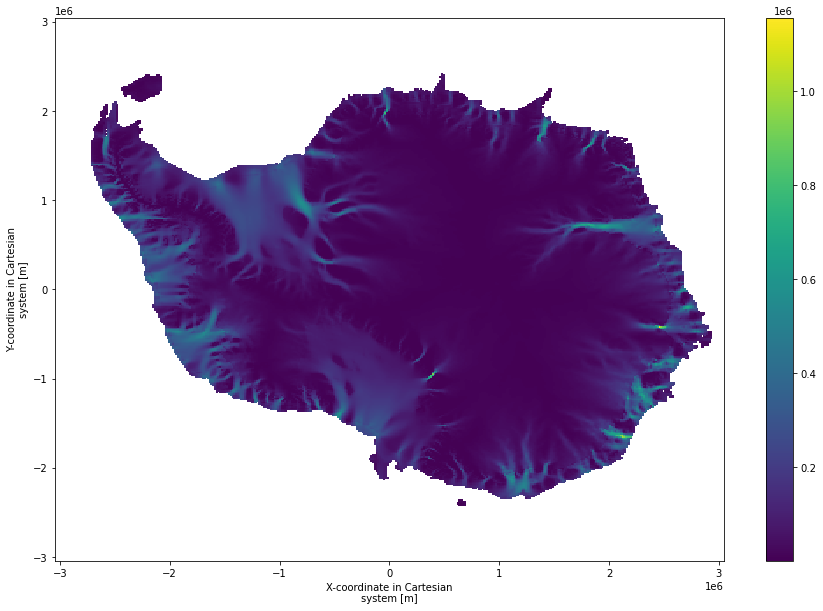

In [27]:
%%time
q.mean({"par_visc","par_esia","par_ppq","par_prec","time"}).plot(size=10)

## 9. Ice volume time series
Another useful quantity we might want to compute is the total volume of grounded ice. 

In [28]:
cellArea = snapshots1ka.x.attrs['spacing_meters'] * snapshots1ka.y.attrs['spacing_meters']

This example sums ice thickness over the x and y dimensions and multiplies by the cell area. 

In [29]:
V = (snapshots1ka.thk.where(snapshots1ka.mask == 2).sum(['x','y'])*cellArea).persist()
V.attrs['units'] = 'm^3'
V.attrs['long_name'] = 'volume'
V.time.attrs['long_name'] = 'simulation time'
V.time.attrs['units'] = 'years BP'
V.name = 'volume'

In [30]:
V

<xarray.DataArray 'volume' (time: 125, par_esia: 4, par_ppq: 4, par_prec: 4, par_visc: 4)>
dask.array<mul, shape=(125, 4, 4, 4, 4), dtype=float32, chunksize=(25, 1, 4, 4, 4), chunktype=numpy.ndarray>
Coordinates:
  * par_esia  (par_esia) float64 1.0 2.0 4.0 7.0
  * par_ppq   (par_ppq) float64 0.25 0.5 0.75 1.0
  * par_prec  (par_prec) float64 0.02 0.05 0.07 0.1
  * par_visc  (par_visc) float64 1e+20 5e+20 2.5e+21 1e+22
  * time      (time) float64 -1.24e+05 -1.23e+05 -1.22e+05 ... -2e+03 -1e+03 0.0
Attributes:
    units:      m^3
    long_name:  volume

### Finally, compute the mean volume at each time step across the ensemble and plot the result.

In [31]:
Vmean = V.mean({'par_esia','par_ppq','par_prec','par_visc'})
Vmean.attrs['units'] = 'm^3'
Vmean.attrs['long_name'] = 'mean volume'
Vmean.time.attrs['long_name'] = 'simulation time'
Vmean.time.attrs['units'] = 'years BP'
Vmean.name = 'mean volume'

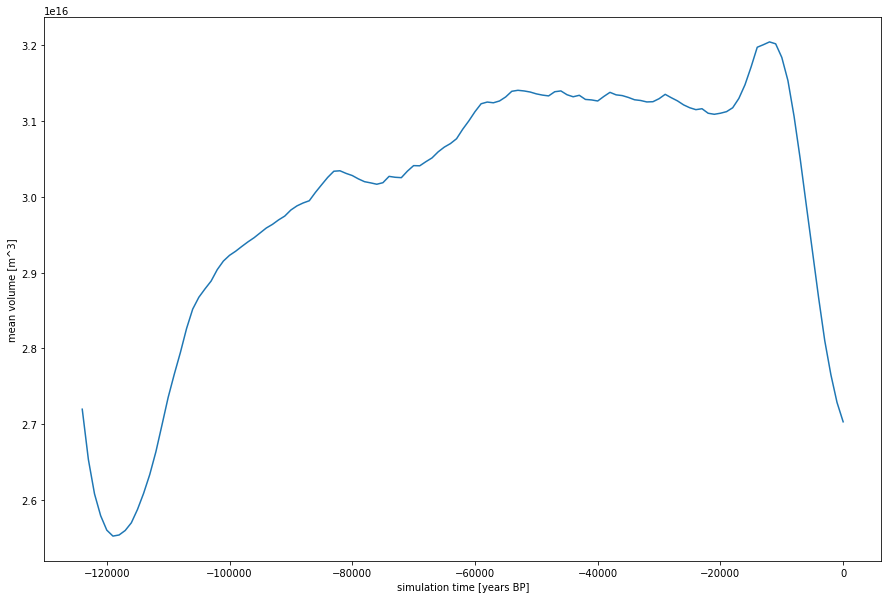

In [32]:
Vmean.plot(size=10)

In [33]:
cluster.shutdown()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.8/ssl.py", line 1309, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLCertVerificationError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1124)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/p